Libraries

Env and client setup

Local Data import

In [3]:
import pandas as pd
df = pd.read_csv("rag_dataset.csv")
df

,_id,id,title,selftext,ups,subreddit,created_utc,num_comments,url,response,comments
0,67558dc2eeb7770cf0a37de7,1gw0btn,How to Pitch and Protect My Startup Idea While...,"Hello Everyone, \r\nI have an idea for a saf...",0,startups,1.732139e+09,2,https://www.reddit.com/r/startups/comments/1gw...,question,"['""I have an idea for a safety device that cou..."
1,67558dc7eeb7770cf0a37e07,1gv2qfs,Your worst moment in VC/Accelerator interviews?,I had a terrible interview yesterday with a VC...,40,startups,1.732037e+09,39,https://www.reddit.com/r/startups/comments/1gv...,experience,"['What made it a terrible interview?', 'If som..."
2,67558dc7eeb7770cf0a37e30,1gtq4ro,how to build a community around my target market?,"Hi, \r\n\r\nI’m working on building a communi...",2,startups,1.731884e+09,2,https://www.reddit.com/r/startups/comments/1gt...,question,"[""I don't know. I think that many people are i..."
3,67558dc2eeb7770cf0a37d9d,1gyjira,How Do I Add a Mobile Money Option to the Payw...,I'm in the process of creating a paywall for m...,0,startups,1.732425e+09,1,https://www.reddit.com/r/startups/comments/1gy...,question,"[""That's literally something you can web searc..."
4,67558dbceeb7770cf0a37d2c,1h24caq,How do you get traffic for SAAS?,I read everywhere that we should first create ...,0,startups,1.732824e+09,4,https://www.reddit.com/r/startups/comments/1h2...,question,['Have you considered posting your idea on soc...
...,...,...,...,...,...,...,...,...,...,...,...
813,67558dc7eeb7770cf0a37e28,1gtzri9,Co-Founder Conflict and Missed Targets in Our ...,I am the co-founder of a ticketing platform (S...,19,startups,1.731916e+09,14,https://www.reddit.com/r/startups/comments/1gt...,experience,"['Am I only cynical, or do 90% of post and com..."
814,67558db3eeb7770cf0a37c74,1h90nxb,Solving for Network Effect - Niche Online Comm...,"Need advice. I’m building a relatively small, ...",0,startups,1.733601e+09,3,https://www.reddit.com/r/startups/comments/1h9...,question,"[""$50 a month for students, might be a hard se..."
815,67558dd6eeb7770cf0a37f42,1gl78qw,Co-founder going though divorce,God’s been testing me. 4 months into starting ...,22,startups,1.730922e+09,51,https://www.reddit.com/r/startups/comments/1gl...,question,['Through his divorce God is testing you. Yay ...
816,67558db8eeb7770cf0a37cd7,1h5u0zc,Strategic Investor or Institutional VC at Seed?,"Hey all, my cyber startup has a grown to $4M o...",2,startups,1.733250e+09,10,https://www.reddit.com/r/startups/comments/1h5...,question,['Most strategics would want an outside VC to ...


In [2]:
df['response'].unique()

array(['question', 'experience', 'promotion'], dtype=object)

C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\2501740875.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='response',palette='muted')


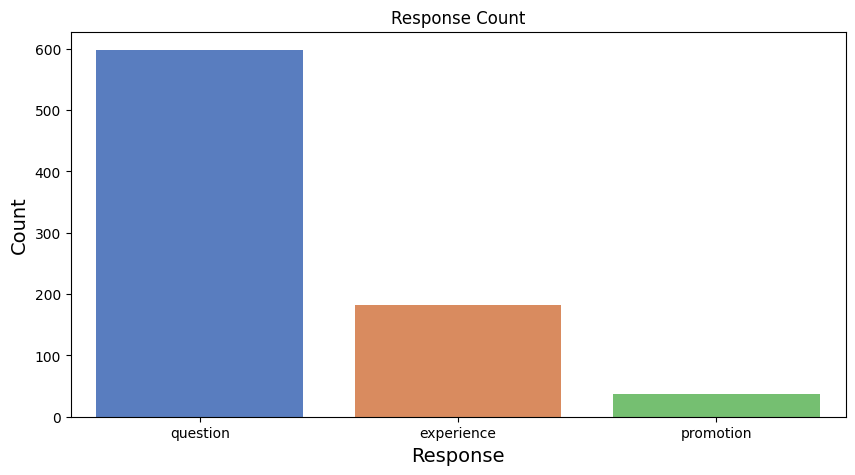

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10,5))
sns.countplot(df,x='response',palette='muted')
plt.title("Response Count")
plt.xlabel("Response", fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

In [8]:
unique_rows = df[~df.duplicated()]
print("Unique Rows:")
unique_rows.shape

Unique Rows:


(818, 11)

Extracting the categorized Data 

In [10]:
df.columns

Index(['_id', 'id', 'title', 'selftext', 'ups', 'subreddit', 'created_utc',
       'num_comments', 'url', 'response', 'comments'],
      dtype='object')

Extracting Question And Experience  Catogorized Data To Find Insights

In [11]:
df_cleaned = df[~df['response'].str.contains('promotion|no_response',case=False,na=False)]
df_cleaned['response'].unique()
df2=df_cleaned
df2.shape
df2['response'].value_counts()

response
question      598
experience    183
Name: count, dtype: int64

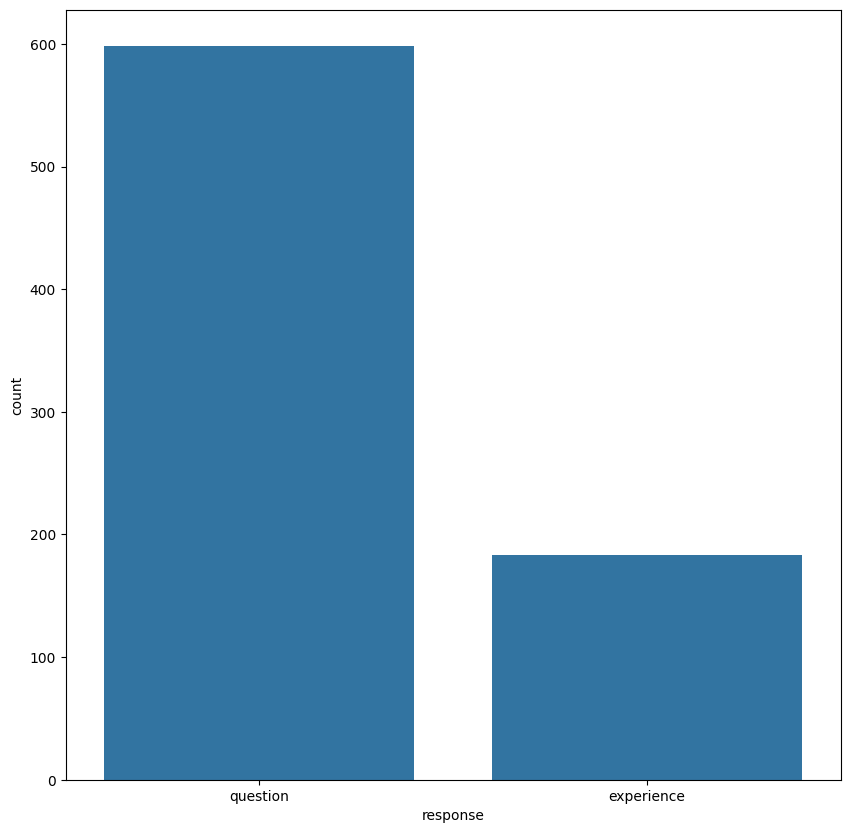

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10,10))
sns.countplot(df2,x='response')
plt.show()

In [13]:
df2['created_date']=pd.to_datetime(df['created_utc'],unit='s') 

C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\346964570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['created_date']=pd.to_datetime(df['created_utc'],unit='s')


In [14]:
df2.head()

,_id,id,title,selftext,ups,subreddit,created_utc,num_comments,url,response,comments,created_date
0,67558dc2eeb7770cf0a37de7,1gw0btn,How to Pitch and Protect My Startup Idea While...,"Hello Everyone, \r\nI have an idea for a saf...",0,startups,1.732139e+09,2,https://www.reddit.com/r/startups/comments/1gw...,question,"['""I have an idea for a safety device that cou...",2024-11-20 21:46:36
1,67558dc7eeb7770cf0a37e07,1gv2qfs,Your worst moment in VC/Accelerator interviews?,I had a terrible interview yesterday with a VC...,40,startups,1.732037e+09,39,https://www.reddit.com/r/startups/comments/1gv...,experience,"['What made it a terrible interview?', 'If som...",2024-11-19 17:30:45
2,67558dc7eeb7770cf0a37e30,1gtq4ro,how to build a community around my target market?,"Hi, \r\n\r\nI’m working on building a communi...",2,startups,1.731884e+09,2,https://www.reddit.com/r/startups/comments/1gt...,question,"[""I don't know. I think that many people are i...",2024-11-17 22:56:18
3,67558dc2eeb7770cf0a37d9d,1gyjira,How Do I Add a Mobile Money Option to the Payw...,I'm in the process of creating a paywall for m...,0,startups,1.732425e+09,1,https://www.reddit.com/r/startups/comments/1gy...,question,"[""That's literally something you can web searc...",2024-11-24 05:17:05
4,67558dbceeb7770cf0a37d2c,1h24caq,How do you get traffic for SAAS?,I read everywhere that we should first create ...,0,startups,1.732824e+09,4,https://www.reddit.com/r/startups/comments/1h2...,question,['Have you considered posting your idea on soc...,2024-11-28 19:57:59


C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\2697600447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['created_date'] = pd.to_datetime(df2['created_date'])
C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\2697600447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = df2['created_date'].dt.year


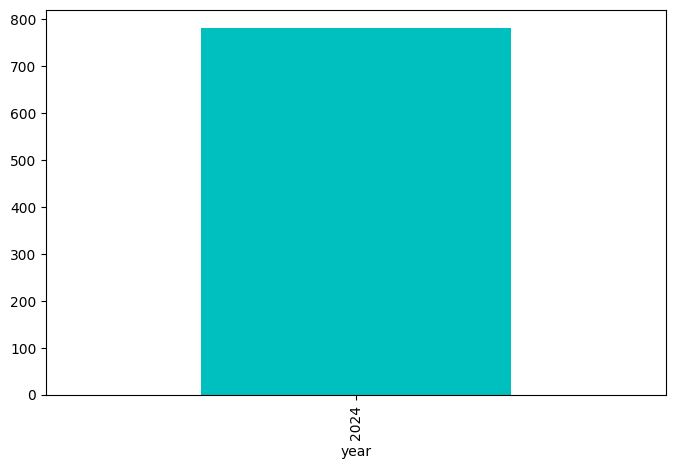

In [15]:
import matplotlib.pyplot as plt
df2['created_date'] = pd.to_datetime(df2['created_date'])
df2['year'] = df2['created_date'].dt.year
yearly_post = df2.groupby('year').size()
yearly_post.plot(kind='bar', figsize=(8, 5), color='c')
plt.show()

In [16]:
df2.drop(labels=['_id','id','created_utc','url'], axis=1,inplace=True)

C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\702079833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(labels=['_id','id','created_utc','url'], axis=1,inplace=True)


In [17]:
df2.head()

,title,selftext,ups,subreddit,num_comments,response,comments,created_date,year
0,How to Pitch and Protect My Startup Idea While...,"Hello Everyone, \r\nI have an idea for a saf...",0,startups,2,question,"['""I have an idea for a safety device that cou...",2024-11-20 21:46:36,2024
1,Your worst moment in VC/Accelerator interviews?,I had a terrible interview yesterday with a VC...,40,startups,39,experience,"['What made it a terrible interview?', 'If som...",2024-11-19 17:30:45,2024
2,how to build a community around my target market?,"Hi, \r\n\r\nI’m working on building a communi...",2,startups,2,question,"[""I don't know. I think that many people are i...",2024-11-17 22:56:18,2024
3,How Do I Add a Mobile Money Option to the Payw...,I'm in the process of creating a paywall for m...,0,startups,1,question,"[""That's literally something you can web searc...",2024-11-24 05:17:05,2024
4,How do you get traffic for SAAS?,I read everywhere that we should first create ...,0,startups,4,question,['Have you considered posting your idea on soc...,2024-11-28 19:57:59,2024


Data Preprocessing 

In [19]:
import re
import string 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def text_cleaning(text):
    if text is None:
        return " "
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text) 
    text = re.sub(r'<.*?>', '', text) 
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\d', '', text) 
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    tokens=[lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    tetx=''.join(tokens)
    return text
df2['cleaned_title']=df2['title'].apply(text_cleaning)
df2['cleaned_selftext']=df2['selftext'].apply(text_cleaning)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aadiluddin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aadiluddin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aadiluddin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\2321715530.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cleaned_title']=df2['title'].apply(text_cleaning)
C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\2321715530.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\336140601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['combined']=df2['cleaned_title']+ " " +df2['cleaned_selftext']


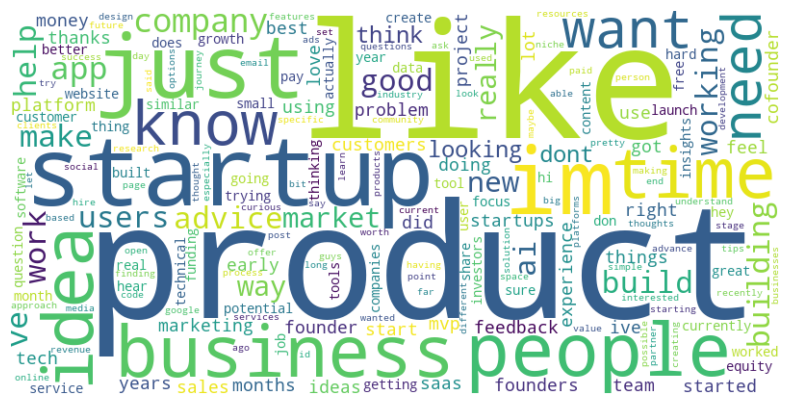

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
df2['combined']=df2['cleaned_title']+ " " +df2['cleaned_selftext']
y=CountVectorizer(stop_words='english',max_features=300)
x=y.fit_transform(df2['combined'])
ordfreq = dict(zip(y.get_feature_names_out(), x.toarray().sum(axis=0)))
wordcloud=WordCloud( width=800,height=400, background_color='white').generate_from_frequencies(ordfreq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Insights from combined Data')
plt.show()


SENTIMENT ANALYSIS

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
x=SentimentIntensityAnalyzer()
def sentiment_analysis(text):
    score=x.polarity_scores(text)
    if score['compound']>=0.05:
        return 'Positive'
    elif score['compound']<=-0.05:
        return 'Negative'
    else:
        return 'Netural'
df2['Sentiment']=df2['combined'].apply(sentiment_analysis)





C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\853054144.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sentiment']=df2['combined'].apply(sentiment_analysis)


In [26]:
df2.head()

,title,selftext,ups,subreddit,num_comments,response,comments,created_date,year,cleaned_title,cleaned_selftext,combined,Sentiment
0,How to Pitch and Protect My Startup Idea While...,"Hello Everyone, \r\nI have an idea for a saf...",0,startups,2,question,"['""I have an idea for a safety device that cou...",2024-11-20 21:46:36,2024,how to pitch and protect my startup idea while...,hello everyone i have an idea for a safety dev...,how to pitch and protect my startup idea while...,Positive
1,Your worst moment in VC/Accelerator interviews?,I had a terrible interview yesterday with a VC...,40,startups,39,experience,"['What made it a terrible interview?', 'If som...",2024-11-19 17:30:45,2024,your worst moment in vcaccelerator interviews,i had a terrible interview yesterday with a vc...,your worst moment in vcaccelerator interviews ...,Negative
2,how to build a community around my target market?,"Hi, \r\n\r\nI’m working on building a communi...",2,startups,2,question,"[""I don't know. I think that many people are i...",2024-11-17 22:56:18,2024,how to build a community around my target market,hi i’m working on building a community of peop...,how to build a community around my target mark...,Positive
3,How Do I Add a Mobile Money Option to the Payw...,I'm in the process of creating a paywall for m...,0,startups,1,question,"[""That's literally something you can web searc...",2024-11-24 05:17:05,2024,how do i add a mobile money option to the payw...,im in the process of creating a paywall for my...,how do i add a mobile money option to the payw...,Positive
4,How do you get traffic for SAAS?,I read everywhere that we should first create ...,0,startups,4,question,['Have you considered posting your idea on soc...,2024-11-28 19:57:59,2024,how do you get traffic for saas,i read everywhere that we should first create ...,how do you get traffic for saas i read everywh...,Positive


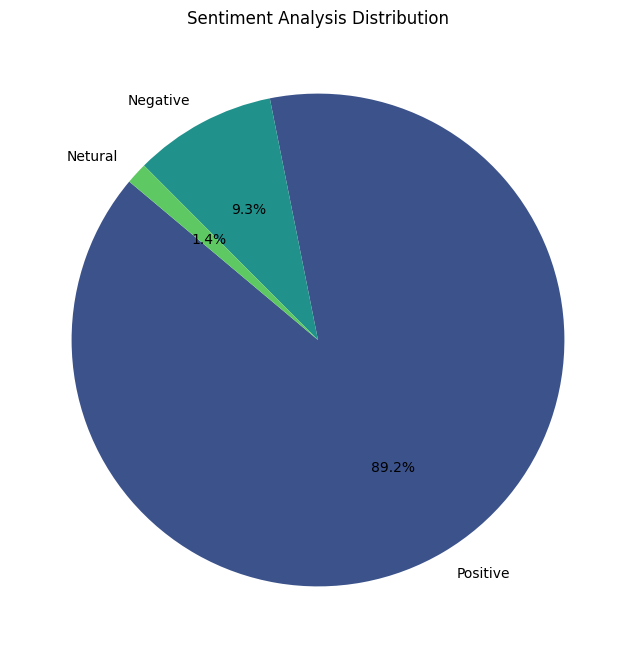

In [27]:
sentiment_counts = df2['Sentiment'].value_counts()
# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(
    sentiment_counts.values, 
    labels=sentiment_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('viridis', len(sentiment_counts))
)
plt.title('Sentiment Analysis Distribution')
plt.show()


TOPIC MODELLING ON POSTIVE SENTIMENT 

In [28]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
positive_posts = df2[df2['Sentiment'] == 'Positive']
vectorizer = CountVectorizer(stop_words='english', max_features=100)
X = vectorizer.fit_transform(positive_posts['combined'])
lda_positive = LatentDirichletAllocation(n_components=5, doc_topic_prior=0.1, topic_word_prior=0.01, random_state=42)
lda_positive.fit(X)
feature_names_positive = vectorizer.get_feature_names_out()
for ind, topic in enumerate(lda_positive.components_):
    print(f"Positive Topic {ind + 1}:")
    print([feature_names_positive[i] for i in topic.argsort()[-10:]])

Positive Topic 1:
['companies', 'market', 'data', 'use', 'platform', 'service', 'tools', 'like', 'business', 'ai']
Positive Topic 2:
['just', 'help', 'make', 'new', 'time', 'idea', 'like', 'users', 'people', 'app']
Positive Topic 3:
['good', 'cofounder', 'years', 'year', 'work', 'equity', 'just', 'like', 'company', 'startup']
Positive Topic 4:
['working', 'did', 'project', 'idea', 'business', 've', 'technical', 'founders', 'startups', 'startup']
Positive Topic 5:
['good', 'need', 'want', 'saas', 'know', 'just', 'ive', 'dont', 'im', 'product']


INSIGHTS FROM POSITIVE SEMNTIMENT POST

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aadiluddin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


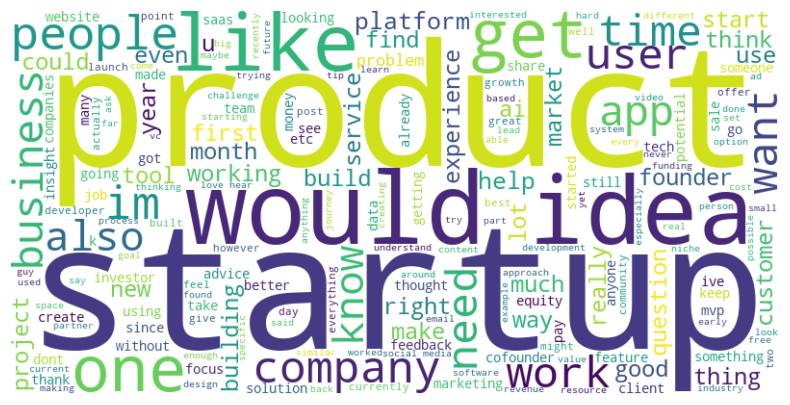

In [29]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Join all positive posts text and filter out stopwords
positive_text = ' '.join(
    word for word in ' '.join(positive_posts['combined']).split()
    if word.lower() not in stop_words
)

# Create WordCloud
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    stopwords=stop_words  # Directly pass stopwords to the WordCloud
).generate(positive_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


BIGRAM-TRIGRAM ANALYSIS


In [30]:
vectorizer = TfidfVectorizer(ngram_range=(2, 3), stop_words='english',max_features=50)
X = vectorizer.fit_transform(positive_posts['combined'])
lda = LatentDirichletAllocation(n_components=5,random_state=42)
lda.fit(X)

,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [31]:
feature_names_positive = vectorizer.get_feature_names_out()
for ind, topic in enumerate(lda.components_):
    print(f"Positive Topic {ind + 1}:")
    print([feature_names_positive[i] for i in topic.argsort()[-10:]])

Positive Topic 1:
['im sure', 'im trying', 'pain points', 'currently working', 'product hunt', 'small businesses', 'technical founder', 'good idea', 'pitch deck', 'social media']
Positive Topic 2:
['im sure', 'seeking advice', 'im trying', 'technical cofounder', 'looking advice', 'let know', 'im looking', 'feel like', 'dont know', 'thanks advance']
Positive Topic 3:
['love hear thoughts', 'potential customers', 'things like', 'months ago', 'hey guys', 'need advice', 'hear thoughts', 'saas product', 'early stage', 'love hear']
Positive Topic 4:
['feels like', 'hi im', 'startup founders', 'building startup', 'started working', 'product market', 'greatly appreciated', 'id love', 'dont want', 'best way']
Positive Topic 5:
['im sure', 'target audience', 'need help', 'im building', 've seen', 'appreciate advice', 'feel free', 'years ago', 'make sure', 'landing page']


C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\2802589278.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_posts['cluster'] = kmeans.fit_predict(X)


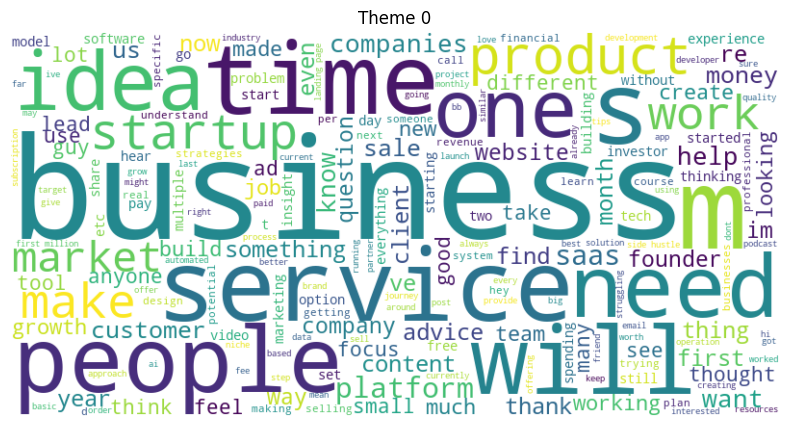

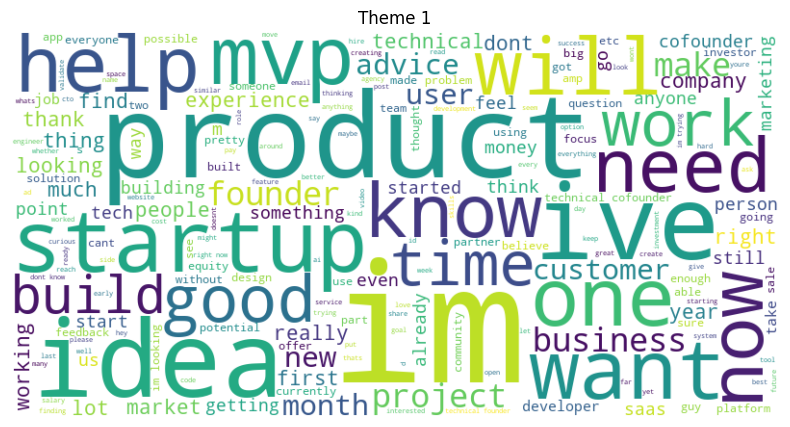

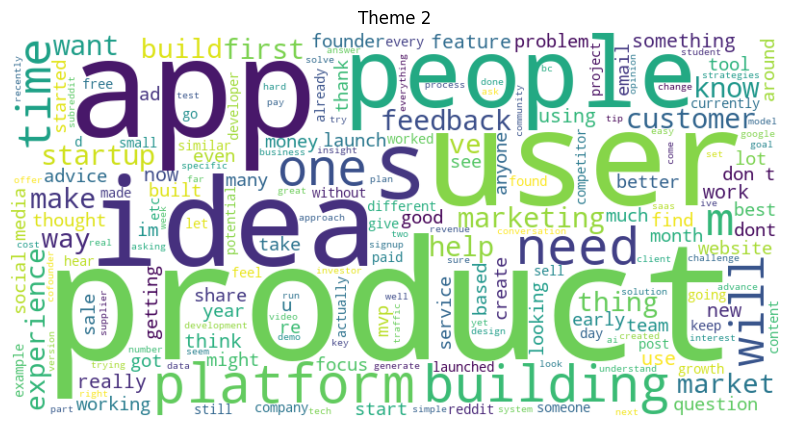

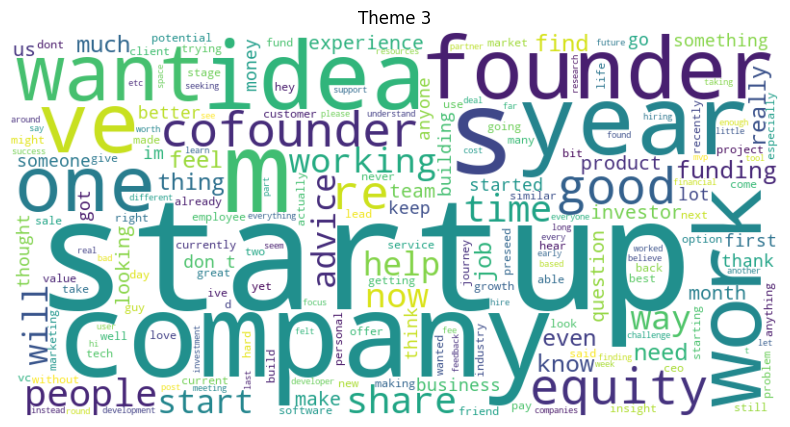

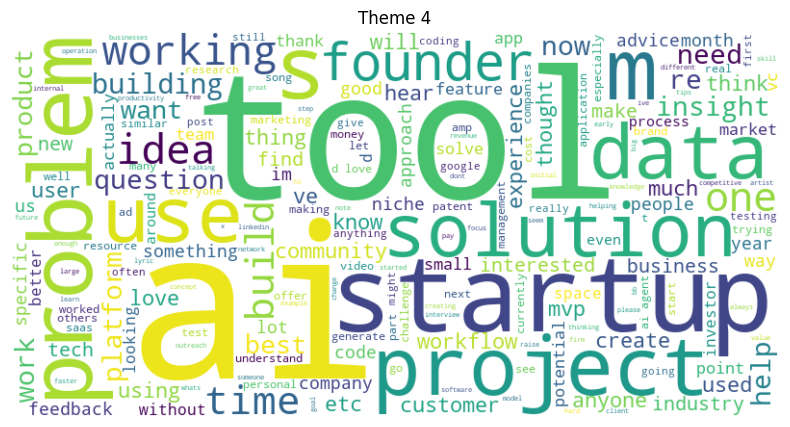

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
tfidf = TfidfVectorizer(stop_words='english', max_features=150)
X = tfidf.fit_transform(positive_posts['combined'])
kmeans = KMeans(n_clusters=5, random_state=42)
positive_posts['cluster'] = kmeans.fit_predict(X)

for i in range(5):
    cluster_indices = positive_posts['cluster'] == i
    cluster_text = ' '.join(positive_posts[cluster_indices]['combined'])
    cluster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(cluster_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Theme {i}')
    plt.show()

In [33]:
from sklearn.decomposition import LatentDirichletAllocation
Negative_posts = df2[df2['Sentiment'] == 'Negative']
vectorizer = CountVectorizer(ngram_range=(2, 3),stop_words='english', max_features=40)
X = vectorizer.fit_transform(Negative_posts['combined'])
lda_Negative = LatentDirichletAllocation(n_components=5, doc_topic_prior=0.1, topic_word_prior=0.01, random_state=42)
lda_Negative.fit(X)
feature_names_Negative = vectorizer.get_feature_names_out()
for ind, topic in enumerate(lda_Negative.components_):
    print(f"Negative Topic {ind + 1}:")
    print([feature_names_Negative[i] for i in topic.argsort()[-10:]])

Negative Topic 1:
['early stage', 'months ago', 'started company', 'time money', 'source code', 'dont know', 'play store', 'past months', 'feels like', 'dont want']
Negative Topic 2:
['need advice', 'months ago', 'startup need', 'started bb', 'work stressed', 'discord server', 'new board', 'board member', 'new board member', 'solo founder']
Negative Topic 3:
['stop doing', 'solo founder', 'lot people', 'split debt', 'small business', 'product companies', 'web design', 'design agency', 'web design agency', 'feel like']
Negative Topic 4:
['need advice', 'dont know', 'stop doing', 'thing said', 'stage testing mvp', 'stage testing', 'early stage', 'solve problem', 'fake downloads', 'idea sell']
Negative Topic 5:
['stop doing', 'startup need', 'work stressed', 'months ago', 'starting business', 'unit economics', 'lot people', 'new technology', 'social media', 'mental health']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aadiluddin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


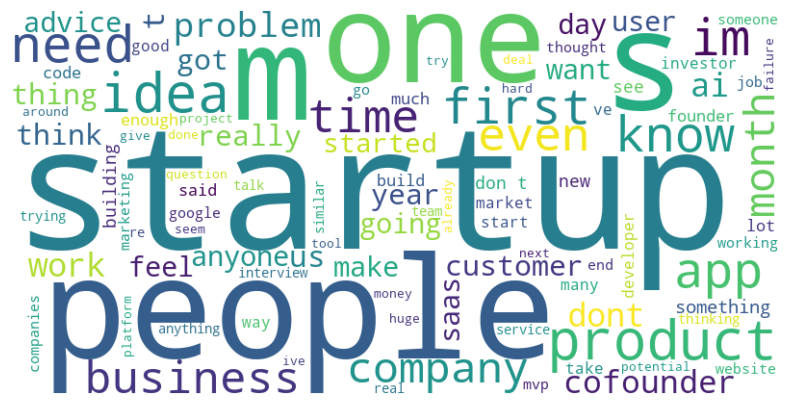

In [34]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
Negative_text = ' '.join(
    word for word in ' '.join(Negative_posts['combined']).split()
    if word.lower() not in stop_words
)

wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100
).generate(Negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
# plt.title("factors affecting the startup")
plt.axis('off')
plt.show()



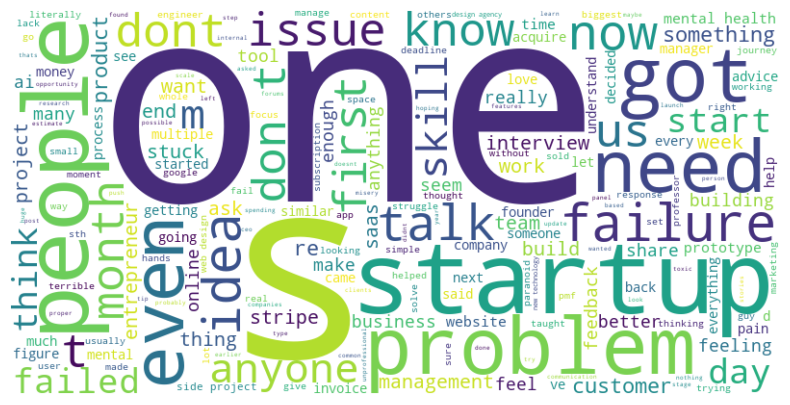

In [35]:
failure_keywords = ['failed', 'failure', 'problems', 'challenges', 'issues', 'mistakes']
failure_posts = Negative_posts[Negative_posts['combined'].str.contains('|'.join(failure_keywords), case=False)]
failure_text = ' '.join(failure_posts['combined'])
failure_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(failure_text)
plt.figure(figsize=(10, 5))
plt.imshow(failure_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
df.columns
ques_df = df2

In [42]:
ques_df.dropna(subset=['title', 'selftext', 'comments'], inplace=True)
ques_df.drop_duplicates(subset=['comments'], inplace=True)
ques_df.shape

C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\701942577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df.dropna(subset=['title', 'selftext', 'comments'], inplace=True)
C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\701942577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df.drop_duplicates(subset=['comments'], inplace=True)


(781, 13)

In [44]:
ques_df['title_cleaned']=ques_df['title'].apply(text_cleaning)
ques_df['seltext_cleaned']=ques_df['selftext'].apply(text_cleaning)
ques_df['comment_cleaned']=ques_df['comments'].apply(text_cleaning)

ques_df.head()


C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\846495325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['title_cleaned']=ques_df['title'].apply(text_cleaning)
C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\846495325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['seltext_cleaned']=ques_df['selftext'].apply(text_cleaning)
C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\846495325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,title,selftext,ups,subreddit,num_comments,response,comments,created_date,year,cleaned_title,cleaned_selftext,combined,Sentiment,title_cleaned,seltext_cleaned,comment_cleaned
0,How to Pitch and Protect My Startup Idea While...,"Hello Everyone, \r\nI have an idea for a saf...",0,startups,2,question,"['""I have an idea for a safety device that cou...",2024-11-20 21:46:36,2024,how to pitch and protect my startup idea while...,hello everyone i have an idea for a safety dev...,how to pitch and protect my startup idea while...,Positive,how to pitch and protect my startup idea while...,hello everyone i have an idea for a safety dev...,i have an idea for a safety device that could ...
1,Your worst moment in VC/Accelerator interviews?,I had a terrible interview yesterday with a VC...,40,startups,39,experience,"['What made it a terrible interview?', 'If som...",2024-11-19 17:30:45,2024,your worst moment in vcaccelerator interviews,i had a terrible interview yesterday with a vc...,your worst moment in vcaccelerator interviews ...,Negative,your worst moment in vcaccelerator interviews,i had a terrible interview yesterday with a vc...,what made it a terrible interview if someone a...
2,how to build a community around my target market?,"Hi, \r\n\r\nI’m working on building a communi...",2,startups,2,question,"[""I don't know. I think that many people are i...",2024-11-17 22:56:18,2024,how to build a community around my target market,hi i’m working on building a community of peop...,how to build a community around my target mark...,Positive,how to build a community around my target market,hi i’m working on building a community of peop...,i dont know i think that many people are in ne...
3,How Do I Add a Mobile Money Option to the Payw...,I'm in the process of creating a paywall for m...,0,startups,1,question,"[""That's literally something you can web searc...",2024-11-24 05:17:05,2024,how do i add a mobile money option to the payw...,im in the process of creating a paywall for my...,how do i add a mobile money option to the payw...,Positive,how do i add a mobile money option to the payw...,im in the process of creating a paywall for my...,thats literally something you can web search o...
4,How do you get traffic for SAAS?,I read everywhere that we should first create ...,0,startups,4,question,['Have you considered posting your idea on soc...,2024-11-28 19:57:59,2024,how do you get traffic for saas,i read everywhere that we should first create ...,how do you get traffic for saas i read everywh...,Positive,how do you get traffic for saas,i read everywhere that we should first create ...,have you considered posting your idea on socia...


In [45]:
ques_df.dropna(subset=['title_cleaned', 'seltext_cleaned', 'comment_cleaned'], inplace=True)
ques_df.drop_duplicates(subset=['comment_cleaned'], inplace=True)


C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\4218631271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df.dropna(subset=['title_cleaned', 'seltext_cleaned', 'comment_cleaned'], inplace=True)
C:\Users\Aadiluddin\AppData\Local\Temp\ipykernel_26996\4218631271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df.drop_duplicates(subset=['comment_cleaned'], inplace=True)


Calcualting then cosine similarity and avg sentiment for the comments 


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer, util
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np

def preprocess(text):
    import re
    lemmatizer = WordNetLemmatizer()  
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  
grouped = ques_df.groupby('post_id')
model = SentenceTransformer('all-MiniLM-L6-v2') 
results = []
for post_id, group in grouped:
    post_title = preprocess(group['title_cleaned'].iloc[0])  
    post_text = preprocess(group['seltext_cleaned'].iloc[0])  
    comments = [preprocess(comment) for comment in group['comment'].tolist()]  
    ups = group['ups'].tolist()  
    comments_with_sentiment = [
        {"comment": comment, 
         "sentiment_score": TextBlob(comment).sentiment.polarity,
         "ups": upvote} for comment, upvote in zip(comments, ups)
    ]
    avg_sentiment = (
        sum([item["sentiment_score"] for item in comments_with_sentiment]) /
        len(comments_with_sentiment) if comments_with_sentiment else 0
    )
    
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
    tfidf_vectors = vectorizer.fit_transform([post_text] + comments)
    cosine_sim = cosine_similarity(tfidf_vectors[0:1], tfidf_vectors[1:]).flatten()
    
    post_embedding = model.encode(post_text)
    comment_embeddings = model.encode(comments)
    semantic_sim = util.cos_sim(post_embedding, comment_embeddings).numpy().flatten()

    combined_scores = 0.1* cosine_sim + 0.9 * semantic_sim
    results.append({
        "post_id": post_id,
        "post_title": post_title,
        "self_text": post_text,
        "comments_with_sentiment": comments_with_sentiment,
        "average_sentiment": avg_sentiment,
        "comments_relevance":  combined_scores.tolist(),
        "comments": comments
    })
results_df = pd.DataFrame(results)
print(results_df)
results_df.head


ModuleNotFoundError: No module named 'sentence_transformers'

In [566]:
results_df.head(3)

,post_id,post_title,self_text,comments_with_sentiment,average_sentiment,comments_relevance,comments
0,1gg25vh,how much to ask a the cto,i am talking to a potential startup they are o...,[{'comment': 'I once got 5% to help build a pr...,0.111642,"[0.0, 0.0319964424359964, 0.12713739180118827,...",[I once got 5% to help build a product from sc...
1,1gg38lo,how do you compile a list of company using a s...,i know builtwith and stackshare but the saas i...,[{'comment': 'Smart approach so far! Another c...,0.167328,[0.04941047447665092],[Smart approach so far! Another couple of idea...
2,1gg4a8b,sellexit saas company,hey everyone is it more challenging to sell a ...,[{'comment': '1. Mhmmm. can be a bit more chal...,0.156700,"[0.16375432462683517, 0.059881234889706036, 0....",[1. Mhmmm. can be a bit more challenging to se...


In [420]:
results_df.shape

(598, 7)

In [571]:
z=results_df['self_text'].iloc[5]
y=results_df['comments_relevance'].iloc[5]
x=results_df['comments'].iloc[5]
print(f"{z} title")
print(f"{x[2]} the comment ")
print(f"{y[2]} comment_relevance")




im curious to know before starting on my idea im not sure how successful it will be after building it but for a safer side i want to make sure we launch a good product which is easily adaptive by user im afraid of ending up with poor product which user refuse to use to so anyone knowledgeable can sharethed to do check list and read the user mind before we spend money kind of like preparing design prototype and check with network if good or market research title
Built your MVP using no code or Cursor AI. Minimal outlay for maximum impact. the comment 
0.20832619071006775 comment_relevance


In [ ]:
ques_df.columns

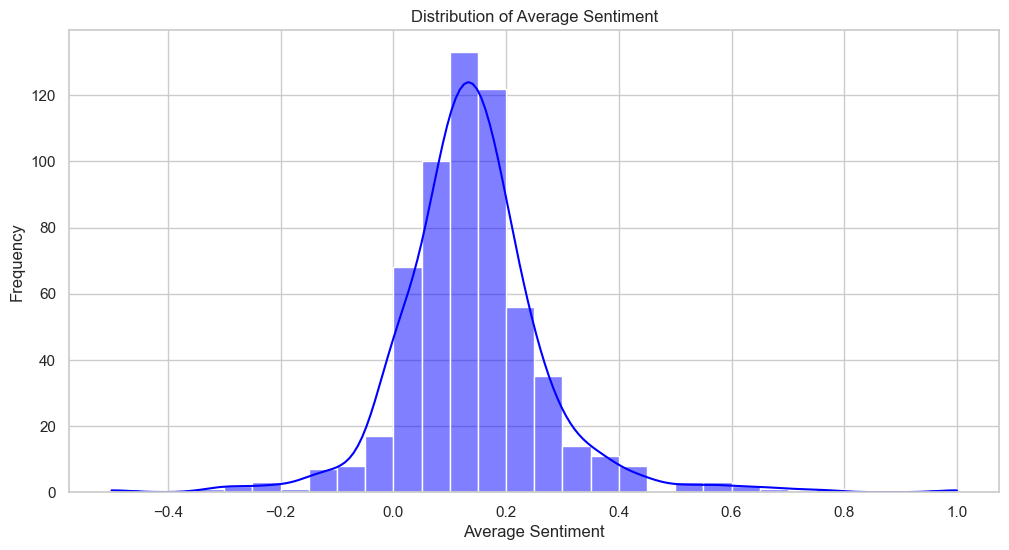

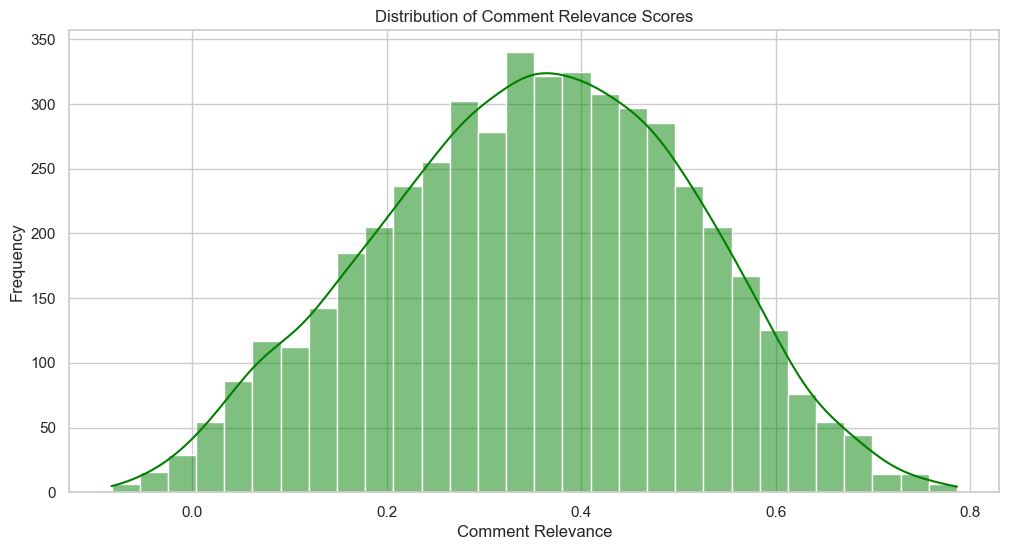

In [572]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Plotting average sentiment
plt.figure(figsize=(12, 6))
sns.histplot(results_df['average_sentiment'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Frequency')
plt.show()

# Plotting comment relevance
plt.figure(figsize=(12, 6))
relevance_data = results_df.explode('comments_relevance')['comments_relevance'].tolist()
sns.histplot(relevance_data, bins=30, kde=True, color='green')
plt.title('Distribution of Comment Relevance Scores')
plt.xlabel('Comment Relevance')
plt.ylabel('Frequency')
plt.show()


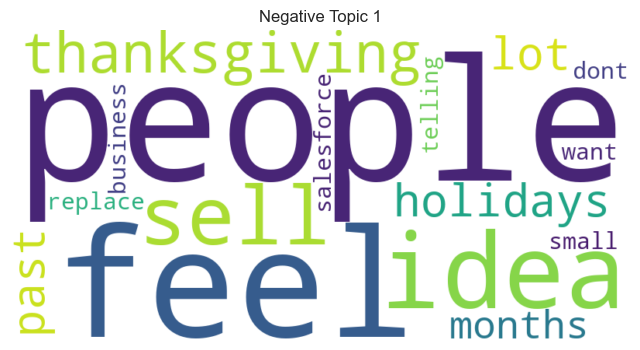

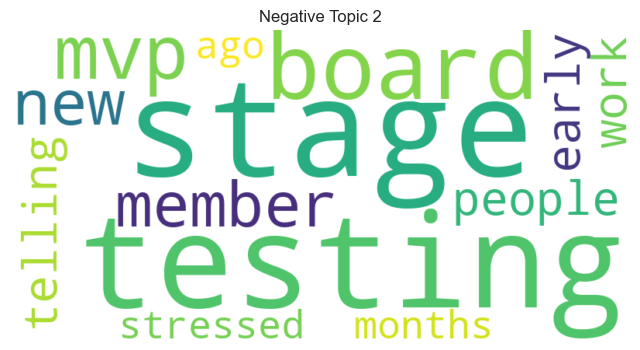

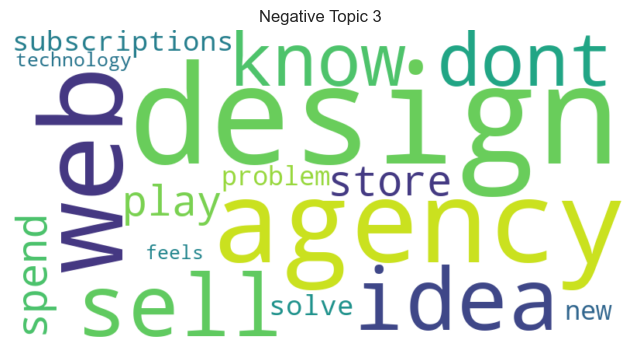

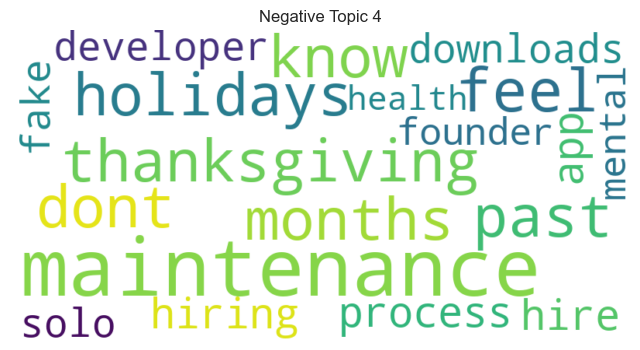

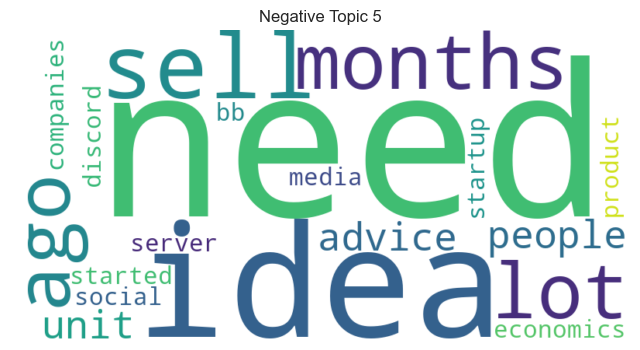

In [577]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the topics
topics = {
    "Negative Topic 1": ['feels like', 'idea sell', 'thanksgiving holidays', 'lot people', 'feel like', 
                         'past months', 'replace salesforce', 'telling people', 'small business', 'dont want'],
    "Negative Topic 2": ['telling people', 'stage testing', 'testing mvp', 'stage testing mvp', 'early stage', 
                         'work stressed', 'board member', 'new board member', 'new board', 'months ago'],
    "Negative Topic 3": ['idea sell', 'dont know', 'play store', 'spend subscriptions', 'solve problem', 
                         'design agency', 'web design', 'web design agency', 'new technology', 'feels like'],
    "Negative Topic 4": ['feel like', 'thanksgiving holidays', 'past months', 'dont know', 'hiring process', 
                         'maintenance app', 'hire developer maintenance', 'fake downloads', 'solo founder', 'mental health'],
    "Negative Topic 5": ['idea sell', 'months ago', 'lot people', 'need advice', 'unit economics', 
                         'started bb', 'product companies', 'startup need', 'discord server', 'social media']
}

# Generate and display a word cloud for each topic
for topic, words in topics.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(topic)
    plt.show()
